## Customer Churn Prediction: Kaggle


Predict wheather customer about to churn or not using machine learning algorithms.

https://inclass.kaggle.com/c/customer-churn-prediction/data

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [42]:
# load the training dataset

train_data = pd.read_table('churn_train.txt', index_col=False, sep=',') # sep is the separator of the file
train_data.head()
train_data = train_data.drop('st',axis=1)
train_data.head()

,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [43]:
# load the test dataset

test_data = pd.read_table('churn_test.txt', sep=',', index_col=False)
test_data.head()
test_st = test_data['st']
test_data = test_data.drop('st',axis=1)

test_data.head()

,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,101,510,354-8815,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,137,510,381-7211,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,103,408,411-9481,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,99,415,418-9100,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,108,415,413-3643,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


## Data Preprocessing

In [44]:
## Data Preprocessing

print(train_data.isnull().any().any())
print(test_data.isnull().any().any())


train_data.info()
train_data.describe()

False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    acclen     3333 non-null   int64  
 1    arcode     3333 non-null   int64  
 2    phnum      3333 non-null   object 
 3    intplan    3333 non-null   object 
 4    voice      3333 non-null   object 
 5   nummailmes  3333 non-null   int64  
 6    tdmin      3333 non-null   float64
 7    tdcal      3333 non-null   int64  
 8    tdchar     3333 non-null   float64
 9    temin      3333 non-null   float64
 10   tecal      3333 non-null   int64  
 11   tecahr     3333 non-null   float64
 12   tnmin      3333 non-null   float64
 13   tn cal     3333 non-null   int64  
 14   tnchar     3333 non-null   float64
 15   timin      3333 non-null   float64
 16   tical      3333 non-null   int64  
 17   tichar     3333 non-null   float64
 18   ncsc       3333 non-null   int64  
 19   label      333

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [45]:
# Change non-numerical data to numerical
from sklearn.preprocessing import LabelEncoder

# Define the columns with non-numerical data
categorical_columns = [' phnum', ' intplan', ' voice', ' label']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [46]:
# split data into input features and label

X_train_data = train_data.drop(' label', axis=1)
y_train_data = train_data[' label']
X_test_data = test_data.drop(' label', axis=1) 
y_test_data = test_data[' label']

In [47]:
X_test_data

,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc
0,101,510,451,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,137,510,905,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,103,408,1467,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,99,415,1601,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,108,415,1501,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,50,408,632,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
1663,152,415,121,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
1664,61,415,97,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
1665,109,510,1133,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [48]:
y_test_data

0       0
1       0
2       0
3       0
4       0
       ..
1662    0
1663    1
1664    0
1665    0
1666    0
Name:  label, Length: 1667, dtype: int32

### Fit and Test Models

#### KNN

In [49]:
# 1. choose model class
from sklearn.neighbors import KNeighborsClassifier

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# find the best n_neighbors value
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 20)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_data, y_train_data)

# Get the best k-value
best_k = grid_search.best_params_['n_neighbors']
print("Best k-value:", best_k)

Best k-value: 7


In [51]:
# 2. instantiate model
customer_knn = KNeighborsClassifier(n_neighbors = 7)
# 3. fit model to data
customer_knn.fit(X_train_data, y_train_data)
# 4. predict on new data
y_test_data_predicted_knn = customer_knn.predict(X_test_data) 

#### Logistic Regression

In [52]:
# 1. choose model class
from sklearn.linear_model import LogisticRegression

In [53]:
warnings.filterwarnings("ignore", category=UserWarning)

# find the best C value
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logreg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
    
grid = grid_search.fit(X_train_data, y_train_data)
grid.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [54]:
# 2. instantiate model
customer_logistic = grid.best_estimator_
# 3. fit model to data
customer_logistic.fit(X_train_data, y_train_data)
# 4. predict on new data
y_test_data_predicted_logreg = customer_logistic.predict(X_test_data)

#### SVM

In [55]:
# 1. choose model class
from sklearn.svm import SVC

In [56]:
# 1. Choose model class and use GridSearchCV to find best parameters
param_grid = {
    'C': [0.000000001, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid = grid_search.fit(X_train_data, y_train_data)
grid.best_estimator_

SVC(C=1e-09)

In [57]:
# 2. Instantiate model
customer_svm = grid.best_estimator_

# 3. Fit model to data
customer_svm.fit(X_train_data, y_train_data)

# 4. Predict on new data
y_test_data_predicted_svm = customer_svm.predict(X_test_data)

#### Gaussian Naive Bayes

In [58]:
# 1. choose model class
from sklearn.naive_bayes import GaussianNB
# 2. instantiate model
gnb = GaussianNB()
# 3. fit model to data
gnb.fit(X_train_data, y_train_data)
# 4. predict on new data
y_test_data_predicted_gnb = gnb.predict(X_test_data)

### Model Comparison/ Performance Evaluation

### measure performance (prediction)
1. Mean square error (MSE)
2. Root mean square error (RMSE) (square root of MSE)
3. R2 (variance) score
4. Signal-to-noise ratio (can be calculated as 10 times the log10 of the ratio of the mean of squared predicted values to the mean of squared errors)

In [59]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

In [60]:
#KNN

# Mean square error (MSE)
mse_knn = mean_squared_error(y_test_data, y_test_data_predicted_knn)
print("Mean Square Error (MSE):", mse_knn)

# Root mean square error (RMSE)
rmse_knn = mean_squared_error(y_test_data, y_test_data_predicted_knn, squared=False)
print("Root Mean Square Error (RMSE):", rmse_knn)

# R2 (variance) score
r2_knn = r2_score(y_test_data, y_test_data_predicted_knn)
print("R2 (Variance) Score:", r2_knn)

# Signal-to-Noise Ratio (SNR) 
mean_squared_predicted_knn = np.mean(y_test_data_predicted_knn ** 2)
mean_squared_error_knn = np.mean((y_test_data - y_test_data_predicted_knn) ** 2)
snr_knn = 10 * np.log10(mean_squared_predicted_knn / mean_squared_error_knn)
print("Signal-to-Noise Ratio (SNR):", snr_knn)

Mean Square Error (MSE): 0.12117576484703059
Root Mean Square Error (RMSE): 0.3481030951414115
R2 (Variance) Score: -0.041771854271853925
Signal-to-Noise Ratio (SNR): -7.738724524043686


In [38]:
y_test_data_predicted_knn

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
#Logistic Regression

# Mean square error (MSE)
mse_lr = mean_squared_error(y_test_data, y_test_data_predicted_logreg)
print("Mean Square Error (MSE):", mse_lr)

# Root mean square error (RMSE)
rmse_lr = mean_squared_error(y_test_data, y_test_data_predicted_logreg, squared=False)
print("Root Mean Square Error (RMSE):", rmse_lr)

# R2 (variance) score
r2_lr = r2_score(y_test_data, y_test_data_predicted_logreg)
print("R2 (Variance) Score:", r2_lr)

# Signal-to-Noise Ratio (SNR) 
mean_squared_predicted_lr = np.mean(y_test_data_predicted_logreg ** 2)
mean_squared_error_lr = np.mean((y_test_data - y_test_data_predicted_logreg) ** 2)
snr_lr = 10 * np.log10(mean_squared_predicted_lr / mean_squared_error_lr)
print("Signal-to-Noise Ratio (SNR):", snr_lr)

Mean Square Error (MSE): 0.12837432513497302
Root Mean Square Error (RMSE): 0.3582936297716902
R2 (Variance) Score: -0.10365929115929085
Signal-to-Noise Ratio (SNR): -4.6118205361821465


In [62]:
#SVM

# Mean square error (MSE)
mse_svm = mean_squared_error(y_test_data, y_test_data_predicted_svm)
print("Mean Square Error (MSE):", mse_svm)

# Root mean square error (RMSE)
rmse_svm = mean_squared_error(y_test_data, y_test_data_predicted_svm, squared=False)
print("Root Mean Square Error (RMSE):", rmse_svm)

# R2 (variance) score
r2_svm = r2_score(y_test_data, y_test_data_predicted_svm)
print("R2 (Variance) Score:", r2_svm)

# Signal-to-Noise Ratio (SNR) 
mean_squared_predicted_svm = np.mean(y_test_data_predicted_svm ** 2)
mean_squared_error_svm = np.mean((y_test_data - y_test_data_predicted_svm) ** 2)
snr_svm = 10 * np.log10(mean_squared_predicted_svm / mean_squared_error_svm)
print("Signal-to-Noise Ratio (SNR):", snr_svm)

Mean Square Error (MSE): 0.13437312537492502
Root Mean Square Error (RMSE): 0.36656940048908204
R2 (Variance) Score: -0.15523215523215494
Signal-to-Noise Ratio (SNR): -inf


C:\Users\User\AppData\Local\Temp\ipykernel_7668\1191140029.py:18: RuntimeWarning: divide by zero encountered in log10
  snr_svm = 10 * np.log10(mean_squared_predicted_svm / mean_squared_error_svm)


In [63]:
#Gaussian Naive Bayes

# Mean square error (MSE)
mse_gnb = mean_squared_error(y_test_data, y_test_data_predicted_gnb)
print("Mean Square Error (MSE):", mse_gnb)

# Root mean square error (RMSE)
rmse_gnb = mean_squared_error(y_test_data, y_test_data_predicted_gnb, squared=False)
print("Root Mean Square Error (RMSE):", rmse_gnb)

# R2 (variance) score
r2_gnb = r2_score(y_test_data, y_test_data_predicted_gnb)
print("R2 (Variance) Score:", r2_gnb)

# Signal-to-Noise Ratio (SNR) 
mean_squared_predicted_gnb = np.mean(y_test_data_predicted_gnb ** 2)
mean_squared_error_gnb = np.mean((y_test_data - y_test_data_predicted_gnb) ** 2)
snr_gnb = 10 * np.log10(mean_squared_predicted_gnb / mean_squared_error_gnb)
print("Signal-to-Noise Ratio (SNR):", snr_gnb)

Mean Square Error (MSE): 0.1271745650869826
Root Mean Square Error (RMSE): 0.35661543024241477
R2 (Variance) Score: -0.09334471834471803
Signal-to-Noise Ratio (SNR): 0.12120632675853438


### Conclusion

Present your findings or summary from your work

#### display bar graph, to compare performance of 4 machine learning models

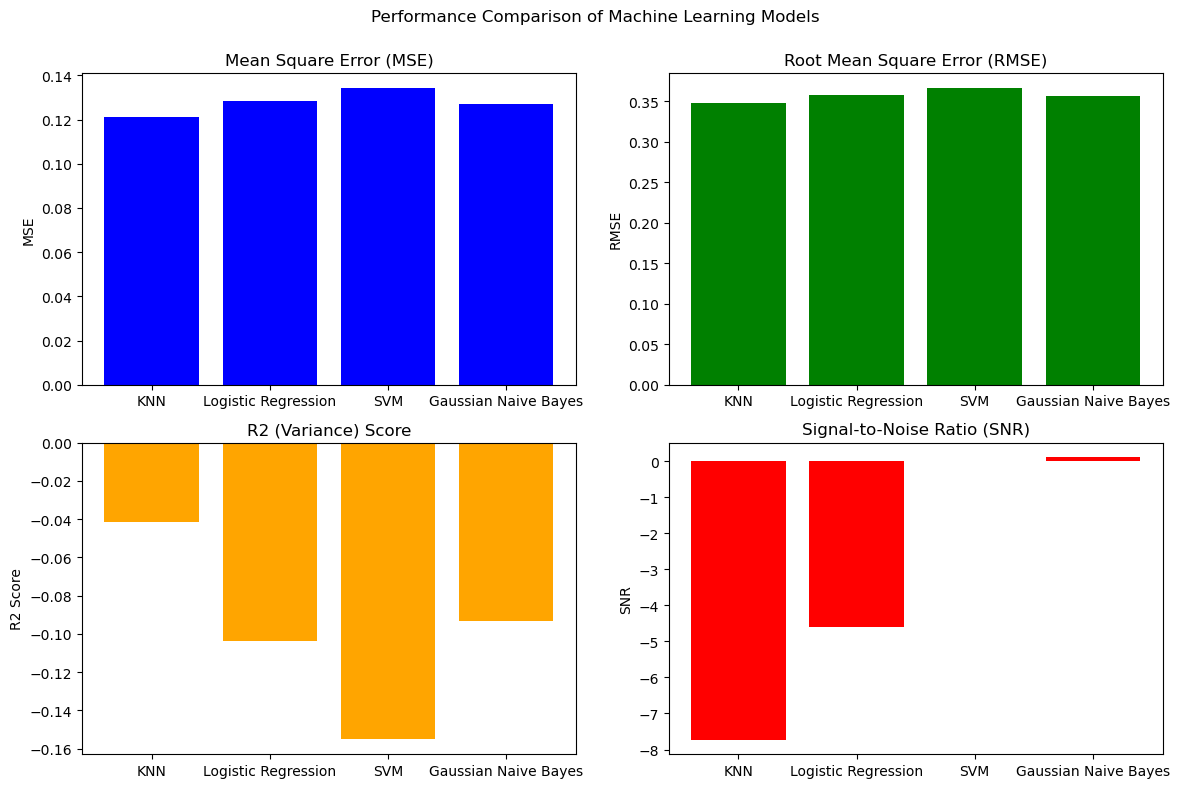

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Logistic Regression', 'SVM', 'Gaussian Naive Bayes']
# Performance metrics for each model
mse = [mse_knn, mse_lr, mse_svm, mse_gnb]
rmse = [rmse_knn, rmse_lr, rmse_svm, rmse_gnb]
r2 = [r2_knn, r2_lr, r2_svm, r2_gnb]
snr = [snr_knn, snr_lr, float(snr_svm), snr_gnb]  # Note: Handling negative infinity
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Comparison of Machine Learning Models')
# Bar plot for MSE
axs[0, 0].bar(models, mse, color='blue')
axs[0, 0].set_title('Mean Square Error (MSE)')
axs[0, 0].set_ylabel('MSE')
# Bar plot for RMSE
axs[0, 1].bar(models, rmse, color='green')
axs[0, 1].set_title('Root Mean Square Error (RMSE)')
axs[0, 1].set_ylabel('RMSE')
# Bar plot for R2 Score
axs[1, 0].bar(models, r2, color='orange')
axs[1, 0].set_title('R2 (Variance) Score')
axs[1, 0].set_ylabel('R2 Score')
# Bar plot for SNR
axs[1, 1].bar(models, snr, color='red')
axs[1, 1].set_title('Signal-to-Noise Ratio (SNR)')
axs[1, 1].set_ylabel('SNR')
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
# Show the plot
plt.show()

#### based on the graph, identify which model give best performance

1. KNN has the lowest MSE and RMSE among all models, indicating better prediction accuracy and smaller prediction errors. However, its R2 score is slightly negative, suggesting a poor fit to the data. The negative SNR indicates the noise is much higher than the signal.

2. Logistic Regression shows slightly higher MSE and RMSE compared to KNN, with a negative R2 score and negative SNR. It seems to have a similar performance trend to KNN but with slightly worse results.

3. SVM has the highest MSE, RMSE, and negative R2 score, indicating relatively poor performance. The undefined SNR suggests that the model's predictions and actual values do not match.

4. Gaussian Naive Bayes has similar MSE and RMSE to Logistic Regression, but its R2 score is better. The positive SNR suggests that the signal is more pronounced compared to the noise.

From this evaluation, it appears that Gaussian Naive Bayes has the relatively best performance among the models considered, with the lowest negative R2 score and a positive SNR. However, it's essential to interpret these results with caution and consider the specific context and requirements of your problem before making a final decision about model selection.